In [15]:
import os
import requests
import pandas as pd
import numpy as np 
import seaborn as sns 
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym
!pip install gym
!pip install gym_anytrading
!pip install stable-baselines3
import gym
import gym_anytrading
from gym_anytrading.envs import StocksEnv

#from stable_baselines.com.vec_env import DummyVecEnv
from stable_baselines import A2C
#import gym_anytrading
!pip install hvplot
import hvplot.pandas
import matplotlib.pyplot as plt
!pip install finta
!pip install yfinance
!pip install YahooFinancials
#!pip install fdpf


import yfinance as yf
from finta import TA

%matplotlib inline
#streamlit or tableau of 


In [16]:
import yfinance as yf
from yahoofinancials import YahooFinancials

In [17]:
def read_data(data, start, end):
    data1_df = yf.download(data, start, end)
    data1_df.dropna(inplace = True)
    dataclose1_df = data1_df
    return dataclose1_df

In [18]:
#This is but one share that has performed well on the Australian share market so we could enhance this for stock selection in a streamlit 
xeroasx = read_data(['XRO.AX'], "2018-01-01","2022-07-28")

[*********************100%***********************]  1 of 1 completed


In [19]:
xeroasx

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,28.719999,28.850000,28.180000,28.350000,28.350000,33682
2018-01-03,28.850000,28.850000,28.250000,28.700001,28.700001,133086
2018-01-04,28.719999,28.719999,28.260000,28.549999,28.549999,147271
2018-01-05,28.650000,29.049999,28.530001,28.900000,28.900000,145177
2018-01-08,29.070000,29.639999,29.070000,29.480000,29.480000,198755
...,...,...,...,...,...,...
2022-07-21,88.000000,90.809998,87.290001,90.500000,90.500000,610120
2022-07-22,90.750000,93.120003,89.360001,91.220001,91.220001,684767
2022-07-25,90.440002,90.980003,88.720001,90.260002,90.260002,608109


In [22]:
#xeroasx['Volume'].apply(lambda x: float()
env = gym.make('stocks-v0'', df = xeroasx, frame_bound =(5,100), windowsize= 5)                   

SyntaxError: EOL while scanning string literal (546327156.py, line 2)

In [11]:
env.signal_features 

NameError: name 'env' is not defined

In [10]:
#xeroasx['OBV'] = calc_ta.OBV(xeroasx)
#xeroasx['KAMA'] = TA.KAMA(xeroasx)
xeroasx['BBANDS'] = TA.BBANDS(ohlc, TA.KAMA(ohlc, 20))
xeroasx['AO'] = TA.AO(ohlc)

NameError: name 'TA' is not defined

In [33]:
# Removing columns other than 'Close' from the dataframe
xeroasx = xeroasx.drop(['Open', 'High', 'Low', 'Volume'], axis = 1)

xeroasx.tail()

,Close,Adj Close
Date,,
2022-07-21,90.500000,90.500000
2022-07-22,91.220001,91.220001
2022-07-25,90.260002,90.260002
2022-07-26,89.129997,89.129997
2022-07-27,89.589996,89.589996


In [24]:
#xeroasx['OBV'] = calc_ta.OBV(xeroasx)
#xeroasx['KAMA'] = TA.KAMA(xeroasx)
xeroasx['BBANDS'] = TA.BBANDS(ohlc, TA.KAMA(ohlc, 20))
xeroasx['AO'] = TA.AO(ohlc)

NameError: name 'TA' is not defined

In [35]:
def add_signals(env):
    start=env.frame_bound[0] - env.window_size
    end=env.xeroasx.loc[:,'Low'].to_numpy()[start:end]
    signal_features=env.xeroasx.loc[:,['Low','Volume', 'BBANDS', 'AO',]]
    return prices, signal_features

In [36]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(xeroasx=xeroasx, window_size=12, frame_bound=(12,50))

TypeError: __init__() got an unexpected keyword argument 'xeroasx'

In [16]:
# Set 9 as the lookback period of the short-term moving average We have experimented with time frames ranging up to 15 -20
shortterm_lookback = 9

# Set 21 as the lookback period of the long-term moving average we have experimented with timeframes up to 35 days 
longterm_lookback = 21

# Store short-term moving average values in the column 'ma_short' 
xeroasx['ma_short'] = xeroasx.Close.rolling(shortterm_lookback).mean()

# Store long-term moving average values in the column 'ma_long'
xeroasx['ma_long'] = xeroasx.Close.rolling(longterm_lookback).mean()

xeroasx.tail()

,Close,Adj Close,ma_short,ma_long
Date,,,,
2022-07-21,90.500000,90.500000,86.254445,83.390952
2022-07-22,91.220001,91.220001,87.027778,84.095714
2022-07-25,90.260002,90.260002,87.692223,84.481905
2022-07-26,89.129997,89.129997,88.106667,84.767619
2022-07-27,89.589996,89.589996,88.382222,85.101904


In [17]:
# Create columm 'signal' to store positiion of the moving averages
xeroasx['signal'] = np.where(xeroasx.ma_short > xeroasx.ma_long, 1, 0)

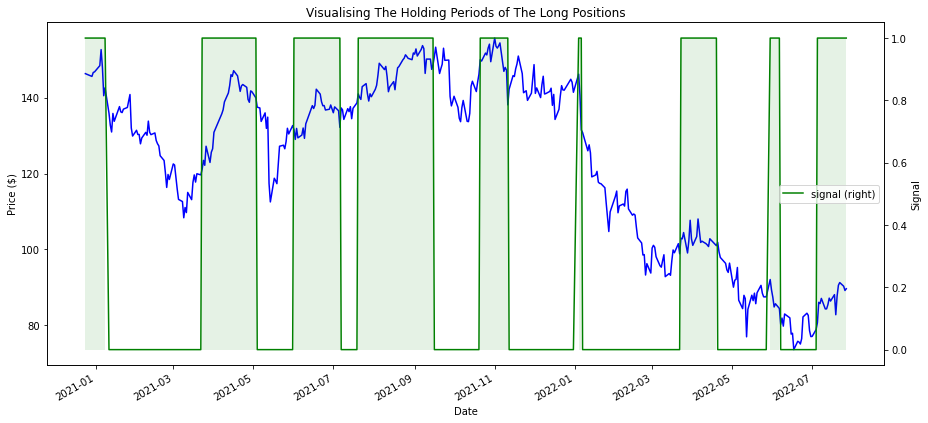

In [18]:
#you can select from 100 days, and again something that can be built int he streamlit 
days = 400

# Plot the close prices of the last X # of  days
close_plot = xeroasx.Close[-days:].plot(figsize=(15, 7), color='blue')

# Plot the signal of the last X #  days
signal_plot = xeroasx.signal[-days:].plot(figsize=(15, 7),
                                       secondary_y=True, ax=close_plot, style='green')

# Highlight the holding periods of the long positions
plt.fill_between(xeroasx.Close[-days:].index, 0, 1,
                 where=(xeroasx.signal[-days:] > 0), color='green', alpha=0.1, lw=0)

# Plot title
signal_plot.set_title('Visualising The Holding Periods of The Long Positions')

# Plot ylabels
close_plot.set_ylabel('Price ($)')
signal_plot.set_ylabel('Signal')

# Legend 
plt.legend()

# Show the plot
plt.show()

In [19]:
# Calculate strategy returns
strategy_returns = xeroasx.signal.shift(1)*xeroasx.Close.pct_change()

# Total strategy returns
print(f'Total strategy returns: {strategy_returns.sum():.2f} %')
print("This has been a particularly tumultuous period for returns")

Total strategy returns: 1.01 %
This has been a particularly tumultuous period for returns


In [20]:
# Create a column 'long_cross_over' to note the long crossover details
xeroasx['long_cross_over'] = np.where((xeroasx.ma_short.shift(
    1) < xeroasx.ma_long.shift(1)) & (xeroasx.ma_short >= xeroasx.ma_long), True, False)

In [21]:
# Create a column 'exit_cross_over' to note the long exit details
xeroasx['exit_cross_over'] = np.where((xeroasx.ma_short.shift(
    1) > xeroasx.ma_long.shift(1)) & (xeroasx.ma_short <= xeroasx.ma_long), True, False)
xeroasx.tail()

,Close,Adj Close,ma_short,ma_long,signal,long_cross_over,exit_cross_over
Date,,,,,,,
2022-07-21,90.500000,90.500000,86.254445,83.390952,1,False,False
2022-07-22,91.220001,91.220001,87.027778,84.095714,1,False,False
2022-07-25,90.260002,90.260002,87.692223,84.481905,1,False,False
2022-07-26,89.129997,89.129997,88.106667,84.767619,1,False,False
2022-07-27,89.589996,89.589996,88.382222,85.101904,1,False,False


In [16]:
# Create a dataframe 'trade_sheet' to store the trades
trade_sheet = pd.DataFrame()

In [17]:
# Initialise the current_position as '0' ie we dont hold any assets yet 
current_position = 0

In [18]:
# Define variable to store long entry date
entry_date = ''

# Define variable to store long entry price
entry_price = ''

# Define variable to store long exit date
exit_date = ''

# Define variable to store long exit price
exit_price = ''

In [19]:
def backtest_trade_sheet(xeroasx, close_column, long_crossover_column, exit_crossover_column):
    # Create a dataframe 'trade_sheet' to store the trades
    trade_sheet = pd.DataFrame()

    # Initialise current_position as '0'
    current_position = 0

    # Define variable to note long entry date
    entry_date = ''

    # Define a variable to note long entry price
    entry_price = ''

    # Define a variable to note long exit date
    exit_date = ''

    # Define a variable to note long exit price
    exit_price = ''

    # Iterate over the dates in the dataframe 'data' 
    for current_date in xeroasx.index:

        # Define the variable 'long_crossover' that stores the long crossover condition on the current_date
        long_crossover = xeroasx.loc[current_date, long_crossover_column]

        # Define the variable 'exit_crossover' that stores the exit crossover value on date current_date
        exit_crossover = xeroasx.loc[current_date, exit_crossover_column]

        # We will enter the long position if we are not holding any position and entry condition is met
        if current_position == 0 and long_crossover == True:

            # Define the variable 'entry_date'
            entry_date = current_date

            # Extract the 'Close price' on the current_date and store in the variable 'entry price'
            entry_price = xeroasx.loc[entry_date, close_column]

            # Since a new long position is opened, change the state of current_position to '1'
            current_position = 1

        # We will exit the long position if we are holding long position and exit condition is met
        elif current_position == 1 and exit_crossover == True:

            # Define the variable 'exit_date'
            exit_date = current_date

            # Extract the 'Close price' on the current_date and store in the variable 'exit price'
            exit_price = xeroasx.loc[exit_date, close_column]

            # Append the details of this trade to the 'trades' dataframe
            trade_sheet = trade_sheet.append(
                [(current_position, entry_date, entry_price, exit_date, exit_price)], ignore_index=True)

            # Since a new long position is closed, change the state of current_position to '0'
            current_position = 0

    # Define the names of columns in 'trades' dataframe
    trade_sheet.columns = ['Position', 'Entry Date',
                           'Entry Price', 'Exit Date', 'Exit Price']
    # Return the trades dataframe
    return trade_sheet

In [20]:
# Save the trades generated in the dataframe 'crossover_trade_sheet'
crossover_trade_sheet = backtest_trade_sheet(
    xeroasx, 'Close', 'long_cross_over', 'exit_cross_over')

# Calculate PnL for each trade
crossover_trade_sheet['PnL'] = (crossover_trade_sheet['Exit Price'] -
                                crossover_trade_sheet['Entry Price']) * crossover_trade_sheet['Position']

# Print the total profit/loss by summing up the PnL of each trade.
print(f'The total PnL of trades generated between 2010-01-01 and 2022-05-31 is $',
      round(crossover_trade_sheet.PnL.sum(), 2))

# Print the last 5 rows of the 'crossover_trade_sheet' dataframe
crossover_trade_sheet.tail()

The total PnL of trades generated between 2010-01-01 and 2022-05-31 is $ 56.11


,Position,Entry Date,Entry Price,Exit Date,Exit Price,PnL
25,1,2021-07-20,141.000000,2021-09-16,150.789993,9.789993
26,1,2021-10-21,150.050003,2021-11-12,142.259995,-7.790009
27,1,2022-01-04,146.220001,2022-01-07,130.830002,-15.389999
28,1,2022-03-23,102.930000,2022-04-20,101.830002,-1.099998
29,1,2022-05-30,92.019997,2022-06-07,80.190002,-11.829994


In [21]:
# Create dataframe to store trade analytics
analytics = pd.DataFrame(index=['Analyse'])

In [22]:
# Calculate total PnL
analytics['Total PnL'] = crossover_trade_sheet.PnL.sum() 

# Print the value
print("Total PnL: ",analytics['Total PnL'][0])

Total PnL:  56.109975814819336


In [23]:
# Number of total trades
analytics['total_trades'] = len(crossover_trade_sheet.loc[crossover_trade_sheet.Position==1])

In [24]:
# Winning trades
analytics['Number of Winners'] = len(crossover_trade_sheet.loc[crossover_trade_sheet.PnL>0])

# Loosing trades
analytics['Number of Losers'] = len(crossover_trade_sheet.loc[crossover_trade_sheet.PnL<=0])

In [25]:
# Winning percentage
analytics['Win (%)'] = 100*analytics['Number of Winners']/analytics.total_trades

# Lossing percentage
analytics['Loss (%)'] = 100*analytics['Number of Losers']/analytics.total_trades



analytics.T

,Analyse
Total PnL,56.109976
total_trades,30.000000
Number of Winners,17.000000
Number of Losers,13.000000
Win (%),56.666667
Loss (%),43.333333


In [26]:
# Create a dataframe to store performance metrics
performance_metrics = pd.DataFrame(index=['Outcomes'])

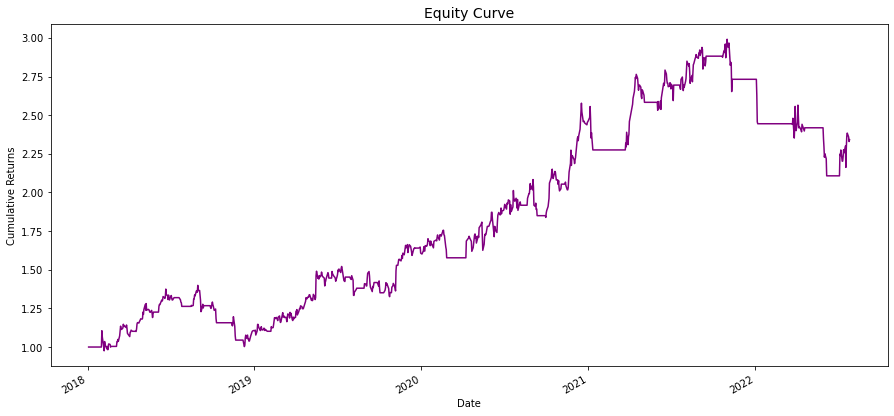

In [27]:
# Calculate strategy returns
xeroasx['Strategy_Returns'] = xeroasx.signal.shift(1) * xeroasx.Close.pct_change()

# Calculate cumulative strategy returns
xeroasx['Cumulative_Returns'] = (xeroasx['Strategy_Returns'] + 1.0).cumprod()

# Plot the cumulative strategy returns
(xeroasx['Cumulative_Returns'].plot(figsize=(15, 7), color='purple'))
plt.title('Equity Curve', fontsize=14)
plt.ylabel('Cumulative Returns')
plt.show()

In [28]:
# Total number of trading days
days = len(xeroasx['Cumulative_Returns'])

# Calculate compounded annual growth rate
performance_metrics['CAGR'] = "{0:.2f}%".format(
    (xeroasx.Cumulative_Returns.iloc[-1]**(252/days)-1)*100)

# Calculate annualised volatility
performance_metrics['Annualised Volatility'] = "{0:.2f}%".format(
    xeroasx['Strategy_Returns'].std()*np.sqrt(252) * 100)

# Set a risk-free rate
risk_free_rate = 0.02/365

# Calculate Sharpe ratio
performance_metrics['Sharpe Ratio'] = np.sqrt(252)*(np.mean(xeroasx.Strategy_Returns) -
                                                    (risk_free_rate))/np.std(xeroasx.Strategy_Returns)

# Compute the cumulative max drawdown
xeroasx['Peak'] = xeroasx['Cumulative_Returns'].cummax()

# Compute the Drawdown
xeroasx['Drawdown'] = ((xeroasx['Cumulative_Returns']-xeroasx['Peak'])/xeroasx['Peak'])

# Compute the maximum drawdown
performance_metrics['Maximum Drawdown'] =  "{0:.2f}%".format((xeroasx['Drawdown'].min())*100)

performance_metrics.T

,Outcomes
CAGR,20.36%
Annualised Volatility,26.01%
Sharpe Ratio,0.790101
Maximum Drawdown,-29.54%


In [29]:
print("This is a lower than expected Sharpe ratio, and this was expected in difficult times when many Cloud based, and other IT related industries and companies were sold off severely")

This is a lower than expected Sharpe ratio, and this was expected in difficult times when many Cloud based, and other IT related industries and companies were sold off severely


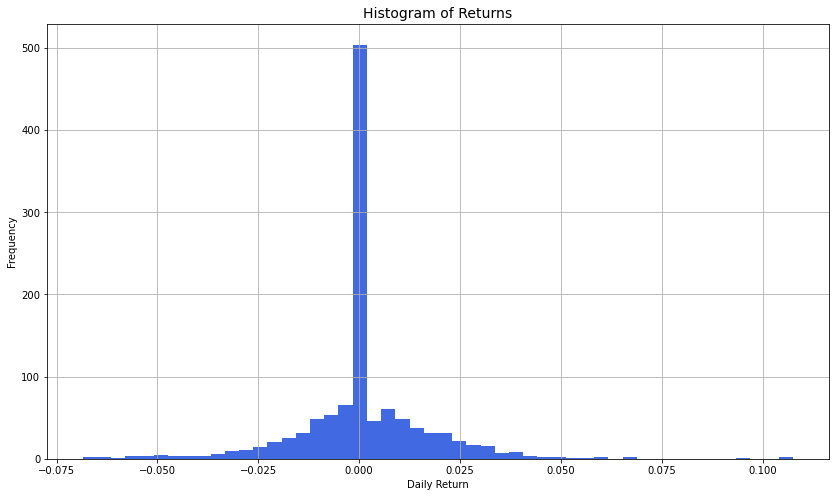

In [31]:
# Plot returns histogram
xeroasx.Strategy_Returns.hist(bins=50, figsize=(14, 8), color='royalblue')
plt.title('Histogram of Returns', fontsize=14)
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

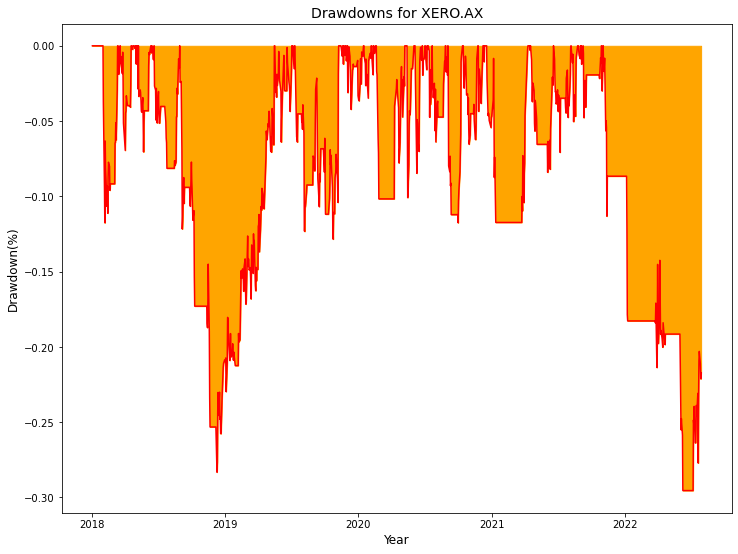

In [32]:
# Define size of graph
plt.figure(figsize=(12, 9))

# Set the title and axis labels
plt.title('Drawdowns for XERO.AX', fontsize=14)
plt.ylabel('Drawdown(%)', fontsize=12)
plt.xlabel('Year', fontsize=12)

# Plot max drawdown
plt.plot(xeroasx['Drawdown'], color='red')

# Fill in-between the drawdown
plt.fill_between(xeroasx['Drawdown'].index, xeroasx['Drawdown'].values, color='orange')
plt.show()

In [72]:
# Step-1: Create a dataframe 'trade_sheet' to store the trades
trade_sheet = pd.DataFrame()

In [73]:
# Step-2: Initialise the current_position as '0'
current_position = 0

In [41]:
#Step-3:
# define a variable to note the stop-loss percentage.  This is based on now 11 + years of outcomes for our clients. 
stop_loss_percentage = 0.09

# Define a variable to store the take profit percentage
take_profit_percentage = 0.15

In [43]:
# Function to generate the trade sheet for strategy with stop-loss and take-profit

def backtest_trade_sheet_sl_tp(xeroasx, close_column, long_crossover_column,exit_crossover_column, stop_loss_percentage, take_profit_percentage):
    """Function to generate trade details
    """
    # Create a dataframe  to store the trades
    crossover_trade_sheet = pd.DataFrame()

    # Initialise the current_position as '0' since we don't hold any position at the beginning of the backtest
    current_position = 0
    stop_loss_breach = False 
    take_profit_breach = False 
    
    # Iterate over the dates in the dataframe 'data'
    for current_date in xeroasx.index:
# Define the variable 'long_crossover' that stores the long crossover condition on current_date
        long_crossover = xeroasx.loc[current_date, long_crossover_column]

# Define the variable 'exit_crossover' that stores the exit crossover condition on current_date
        exit_crossover = xeroasx.loc[current_date, exit_crossover_column]

# Check if we are holding a long position
        if (current_position == 1):

        # Stop-loss = entry_price - (entry_price * stop_loss_percentage)
            stop_loss = entry_price * (1-stop_loss_percentage)

        # Take-profit = entry_price + (entry_price * take_profit_percentage)
            take_profit = entry_price * (1+take_profit_percentage)
            
        # stop-loss condition        
            stop_loss_breach = xeroasx.loc[current_date, close_column] <= stop_loss

        # take-profit condition        
            take_profit_breach = xeroasx.loc[current_date, close_column] >= take_profit        


        # if low is below stop-loss or high is above take-profit
        if stop_loss_breach or take_profit_breach:
                
            # Define the variable 'exit_date'
            exit_date = current_date

                # Extract exit price of the trade using the 'exit_date' and 'close_column' of dataframe 'data'
            exit_price = xeroasx.loc[exit_date, close_column]

                # Exit type if 'Stop-Loss' if stop-loss was breached and 'Take-Profit' if take-profit was breached
            exit_type = "Stop-Loss" if stop_loss_breach else "Take-Profit"

                # Append the details of this trade to the 'trades' dataframe
            crossover_trade_sheet = crossover_trade_sheet.append(
                    [(current_position, entry_date, entry_price, exit_date, exit_price, exit_type)], ignore_index=True)

                # Since a new long position is closed, change the state of current_position to '0'
            current_position = 0
        # We will enter the long position if we are not holding any position and entry condition is met
        if current_position == 0 and long_crossover > 0:

            # Define the variable 'entry_date'
            entry_date = current_date

            # Extract entry price of the trade using the 'entry_date' and 'close_column' of dataframe 'data'
            entry_price = xeroasx.loc[entry_date, close_column]

            # Since a new long position is opened, change the state of current_position to '1'
            current_position = 1

        # We will exit the long position if we are holding long position and exit condition is met
        elif current_position == 1 and exit_crossover > 0:

            # Define the variable 'exit_date'
            exit_date = current_date

            # Extract exit price of the trade using the 'exit_date' and 'close_column' of dataframe 'data'
            exit_price = xeroasx.loc[exit_date, close_column]

            # Exit type is 'Squareoff'
            exit_type = 'Squareoff'

            # Append the details of this trade to the 'trades' dataframe
            crossover_trade_sheet = crossover_trade_sheet.append(
                [(current_position, entry_date, entry_price, exit_date, exit_price, exit_type)], ignore_index=True)

            # Since a new long position is closed, change the state of current_position to '0'
            current_position = 0

    # Define the names of columns in 'trades' dataframe
    crossover_trade_sheet.columns = ['Position', 'Entry Date',
                      'Entry Price', 'Exit Date', 'Exit Price', 'Exit Type']

    # Return the xeroasxtrades dataframe
    return crossover_trade_sheet

In [44]:
# Using 9% as stop_loss_percentage and 15% as take_profit_percentage
# Save the trades generated in the dataframe 'crossover_trade_sheet'
crossover_trade_sheet_sl_tp = backtest_trade_sheet_sl_tp(
    xeroasx, 'Close', 'long_cross_over', 'exit_cross_over',  0.09, 0.15)

crossover_trade_sheet_sl_tp['PnL'] = (crossover_trade_sheet_sl_tp['Exit Price'] -
                     crossover_trade_sheet_sl_tp['Entry Price']) * crossover_trade_sheet_sl_tp['Position']

# Print the total profit/loss of the trades generated over the historical time period
print(f'The total PnL of trades generated between 2010-01-01 and 2022-05-31 is $',
      round(crossover_trade_sheet_sl_tp.PnL.sum(), 2))

# Print the last 5 rows of the 'crossover_trade_sheet_sl_tp' dataframe
crossover_trade_sheet_sl_tp.tail(20)



The total PnL of trades generated between 2010-01-01 and 2022-05-31 is $ 68.91


,Position,Entry Date,Entry Price,Exit Date,Exit Price,Exit Type,PnL
293,1,2022-05-30,92.019997,2022-06-07,80.190002,Stop-Loss,-11.829994
294,0,2022-05-30,92.019997,2022-06-08,81.849998,Stop-Loss,-0.000000
295,0,2022-05-30,92.019997,2022-06-09,79.720001,Stop-Loss,-0.000000
296,0,2022-05-30,92.019997,2022-06-10,82.930000,Stop-Loss,-0.000000
297,0,2022-05-30,92.019997,2022-06-14,81.900002,Stop-Loss,-0.000000
298,0,2022-05-30,92.019997,2022-06-15,77.610001,Stop-Loss,-0.000000
299,0,2022-05-30,92.019997,2022-06-16,77.849998,Stop-Loss,-0.000000
300,0,2022-05-30,92.019997,2022-06-17,73.519997,Stop-Loss,-0.000000
301,0,2022-05-30,92.019997,2022-06-20,75.720001,Stop-Loss,-0.000000
302,0,2022-05-30,92.019997,2022-06-21,75.510002,Stop-Loss,-0.000000


In [45]:
# Brokerage fee
brokerage = 0.03/100

# Total brokerage cost
broker_cost = brokerage
broker_cost

0.0003

In [46]:
# Calculate strategy returns
xeroasx['strategy_ret'] = xeroasx.signal.shift(1) * xeroasx.Close.pct_change()



In [48]:
# Calculate the trading cost 
trading_cost = (broker_cost * np.abs(xeroasx.signal -
                                       xeroasx.signal.shift(1)))

# Calculate net strategy returns
xeroasx['strategy_returns_minus_cost'] = xeroasx['strategy_ret'] - trading_cost

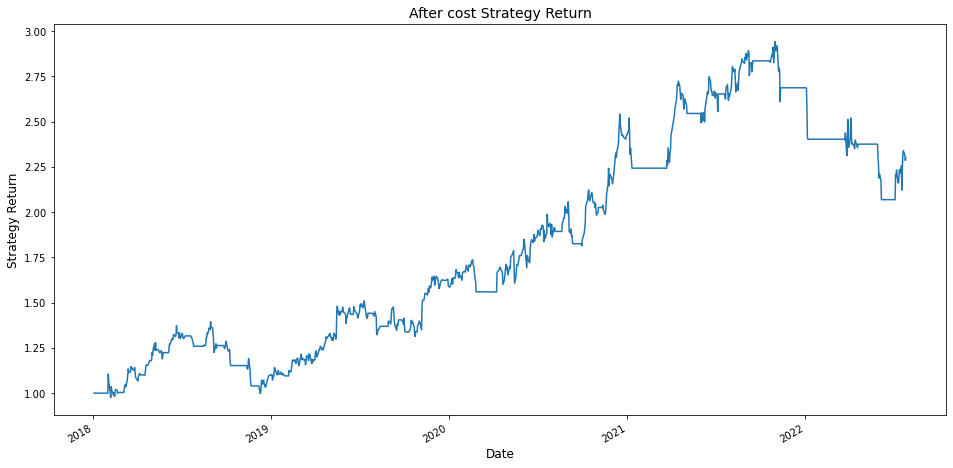

In [49]:
# Calculating plotting cumulative strategy return
cum_strategy_returns = (xeroasx['strategy_returns_minus_cost']+1).cumprod()
cum_strategy_returns.plot(figsize=(16, 8))

plt.title('After cost Strategy Return', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Strategy Return', fontsize=12)
plt.show()

In [50]:
# Initialize trade_type column for buys and sells
xeroasx['trade_type'] = np.nan
xeroasx['units_transacted'] = 0

xeroasx["cost/proceeds"] = np.nan
# Initialize variable to hold the previous_price
previous_price = 0
share_size = 500 

In [51]:
# Now we implement a strategy to buy low, and sell on uptick 
for index, row in xeroasx.iterrows():
    # buy if the previous price is 0, in other words, buy on the first day
    # set the cost/proceeds column equal to the negative value of the row close price
    # multiplied by the share_size
    if previous_price == 0:
        xeroasx.loc[index, "trade_type"] = "buy"
        xeroasx.loc[index, "cost/proceeds"] = -(row["Close"] * share_size)
        xeroasx.loc[index,"units_transacted"] = share_size

    # buy if the current day price is less than the previous day price
    # set the cost/proceeds column equal to the negative value of the row close price
    # multiplied by the share_size
    elif row["Close"] < previous_price:
        xeroasx.loc[index, "trade_type"] = "buy"
        xeroasx.loc[index, "cost/proceeds"] = -(row["Close"] * share_size)
        xeroasx.loc[index,"units_transacted"] = share_size
    
    # sell if the current day price is greater than the previous day price
    elif row["Close"] > previous_price:
        xeroasx.loc[index, "trade_type"] = "sell"
        xeroasx.loc[index, "cost/proceeds"] = row["Close"] * share_size
        xeroasx.loc[index,"units_transacted"] = -share_size

    # else hold if the current day price is equal to the previous day price
    else:
        xeroasx.loc[index, "trade_type"] = "hold"
    
    # set the previous_price variable to the close price of the current row
    previous_price = row["Close"]
    
    # if the index is the last index of the Dataframe, sell
    # set the cost/proceeds column equal to the row close price multiplied 
    # by the accumulated_shares
    if index == xeroasx.index[-1]:
        xeroasx.loc[index, "trade_type"] = "sell"
        xeroasx.loc[index,"units_transacted"] = -xeroasx.loc[xeroasx.index < index,"units_transacted"].sum()
        xeroasx.loc[index, "cost/proceeds"] = row["Close"] * -xeroasx.loc[index,"units_transacted"]

In [52]:
xeroasx

,Close,Adj Close,ma_short,ma_long,signal,long_cross_over,exit_cross_over,Strategy_Returns,Cumulative_Returns,Peak,Drawdown,strategy_ret,strategy_returns_minus_cost,trade_type,units_transacted,cost/proceeds
Date,,,,,,,,,,,,,,,,
2018-01-02,28.350000,28.350000,NaN,NaN,0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,buy,500,-1.417500e+04
2018-01-03,28.700001,28.700001,NaN,NaN,0,False,False,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,sell,-500,1.435000e+04
2018-01-04,28.549999,28.549999,NaN,NaN,0,False,False,-0.000000,1.000000,1.000000,0.000000,-0.000000,-0.000000,buy,500,-1.427500e+04
2018-01-05,28.900000,28.900000,NaN,NaN,0,False,False,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,sell,-500,1.445000e+04
2018-01-08,29.480000,29.480000,NaN,NaN,0,False,False,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,sell,-500,1.474000e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-21,90.500000,90.500000,86.254445,83.390952,1,False,False,0.032634,2.365280,2.991283,-0.209276,0.032634,0.032634,sell,-500,4.525000e+04
2022-07-22,91.220001,91.220001,87.027778,84.095714,1,False,False,0.007956,2.384098,2.991283,-0.202985,0.007956,0.007956,sell,-500,4.561000e+04
2022-07-25,90.260002,90.260002,87.692223,84.481905,1,False,False,-0.010524,2.359008,2.991283,-0.211373,-0.010524,-0.010524,buy,500,-4.513000e+04


In [85]:
 # Calculate the total profit/loss for 100 share size orders
total_profit_loss = round(xeroasx["cost/proceeds"].sum(), 2)

# Print the profit/loss metrics
print(f"The total profit/loss of the trading strategy is ${total_profit_loss}.")

The total profit/loss of the trading strategy is $480685.14.
